# 导入全部数据

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm

base_dir = "../../数据获取/baostock/k线数据"

filenames = os.listdir(base_dir)

dts = {}

with tqdm(total=len(filenames)) as pbar:
    for i in range(len(filenames)):
        filename = filenames[i]
        if filename[-3:] == 'csv':
            file_path = os.path.join(base_dir, filename)
            dt =  pd.read_csv(file_path)
            dt['date']=pd.to_datetime(dt['date'])
            if len(dt) > 0:
                # 然后读取数据
                dts[filename] = dt
        pbar.update(1)
                

100%|██████████████████████████████████████████████████████████████████████████████| 4687/4687 [02:14<00:00, 34.93it/s]


In [2]:
# 先修改日期格式
for key in dts:
    dts[key]['date']=pd.to_datetime(dts[key]['date'])

# 我看看总的下跌和上涨的比例是什么样的

In [3]:
for key in dts:
    dts[key]['updownratio'] = dts[key].apply(lambda x: x['close']/x['open']*100-100 , axis=1)

In [4]:
# 这里取得所有的比例
_updownratios = []
for key in dts:
    _updownratios.extend(list(dts[key]['updownratio']))

In [5]:
len(_updownratios)

8683730

In [6]:
_updownratios[:10]

[-2.9317453046266593,
 -0.28024287716020524,
 -1.6909347111319732,
 -2.011494252873561,
 1.720747295968522,
 -4.212962962962976,
 0.8240426563257444,
 -2.0740740740740904,
 0.5032712632108627,
 0.09990009990008275]

In [7]:
_updownratios2 = [round(x) for x in _updownratios]

In [8]:
_updownratios3 = {}
for i in _updownratios2:
    if i in _updownratios3:
        _updownratios3[i] += 1
    else:
        _updownratios3[i] = 1

In [9]:
_updownratios3

{-3: 434933,
 0: 2146766,
 -2: 793078,
 2: 827143,
 -4: 237657,
 1: 1400538,
 3: 469979,
 -1: 1302070,
 5: 161971,
 -5: 131179,
 4: 272045,
 6: 96940,
 7: 60652,
 -9: 21176,
 8: 41955,
 10: 35758,
 -7: 47227,
 -6: 75330,
 -8: 31409,
 9: 34035,
 -10: 15123,
 -15: 455,
 11: 15940,
 12: 7404,
 -18: 826,
 17: 604,
 15: 1289,
 -13: 1361,
 -11: 4595,
 16: 932,
 13: 3521,
 -12: 2295,
 14: 1905,
 22: 706,
 -14: 789,
 21: 353,
 20: 1529,
 -16: 413,
 18: 513,
 19: 478,
 -17: 440,
 -30: 5,
 -35: 2,
 -26: 5,
 29: 6,
 28: 7,
 38: 6,
 33: 5,
 40: 7,
 25: 22,
 60: 6,
 32: 8,
 26: 14,
 31: 6,
 -19: 32,
 24: 50,
 23: 80,
 -22: 11,
 27: 11,
 43: 2,
 -25: 3,
 46: 1,
 -24: 5,
 39: 3,
 30: 10,
 34: 6,
 47: 3,
 -28: 2,
 -20: 34,
 35: 6,
 41: 1,
 48: 3,
 -23: 7,
 -21: 13,
 36: 4,
 42: 3,
 -34: 2,
 52: 1,
 89: 1,
 70: 1,
 44: 2,
 -29: 1,
 -33: 3,
 50: 1,
 -31: 1,
 -27: 1,
 49: 2,
 68: 1,
 115: 1,
 74: 2,
 64: 1,
 37: 2,
 86: 1,
 61: 1,
 94: 1,
 63: 1,
 127: 1,
 53: 1}

In [10]:
# 然后排序，输出图形的结果

In [11]:
_nums = list(_updownratios3.keys())

In [12]:
_nums.sort()

In [13]:
_counts = [_updownratios3[i] for i in _nums]

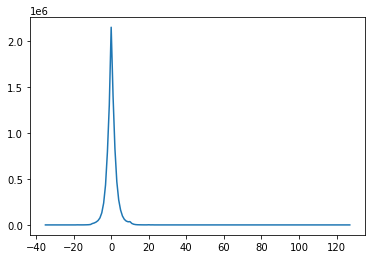

In [14]:
plt.plot(_nums, _counts)

In [15]:
# 值保留小范围的值
_nums2 = [i for i in _nums if abs(i) < 10]

In [16]:
_counts2 = [_updownratios3[i] for i in _nums2]

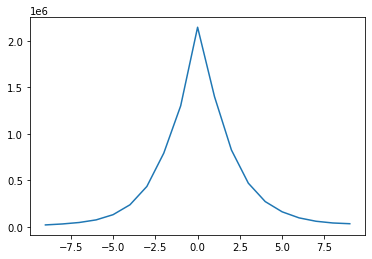

In [17]:
plt.plot(_nums2, _counts2)

# 我试试下跌的时候都是星期几吧

In [18]:
# 我这里拼接成一个大的表
dt_all = pd.concat(dts.values())

In [19]:
dt_all.head()

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST,updownratio
0,2010-01-04,sh.600000,5.984629,5.995595,5.800951,5.809175,5.946248,66191338.0,1.419984e+09,2,0.835129,1,-2.3052,0,-2.931745
1,2010-01-05,sh.600000,5.869487,5.916092,5.699516,5.853038,5.809175,115147943.0,2.436891e+09,2,1.452808,1,0.7551,0,-0.280243
2,2010-01-06,sh.600000,5.836590,5.839331,5.724189,5.737897,5.853038,96782575.0,2.034174e+09,2,1.221095,1,-1.9672,0,-1.690935
3,2010-01-07,sh.600000,5.724189,5.768053,5.565184,5.609048,5.737897,85236072.0,1.761801e+09,2,1.075414,1,-2.2456,0,-2.011494
4,2010-01-08,sh.600000,5.576150,5.702258,5.565184,5.672101,5.609048,65707646.0,1.349532e+09,2,0.829026,1,1.1241,0,1.720747


In [20]:
dt_all['week'] = dt_all['date'].dt.dayofweek+1

In [36]:
dt_all['updown'] = dt_all['updownratio'].apply(lambda x : True if x > 0 else False)

In [51]:
tmp = dt_all.groupby(['week','updown'])['updown'].agg('count')
tmp

week  updown
1     False     822459
      True      865870
2     False     860966
      True      885559
3     False     922241
      True      841701
4     False     971357
      True      782816
5     False     895887
      True      834874
Name: updown, dtype: int64

In [47]:
tmp2_true = [0] * 5
tmp2_false = [0] * 5
for i in tmp.index:
    print(i)
    if i[1] == True:
        tmp2_true[i[0]-1] = tmp[i]
    else:
        tmp2_false[i[0]-1] = tmp[i]

(1, False)
(1, True)
(2, False)
(2, True)
(3, False)
(3, True)
(4, False)
(4, True)
(5, False)
(5, True)


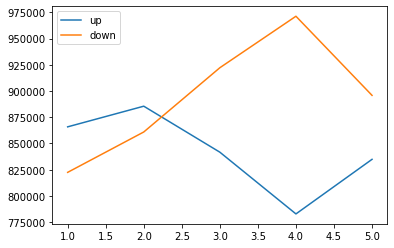

In [55]:
_x = list(range(1,6,1))
plt.plot(_x, tmp2_true,label='up')
plt.plot(_x, tmp2_false,label='down')
plt.legend()

In [24]:
dt_all.head()

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST,updownratio,week,updown
0,2010-01-04,sh.600000,5.984629,5.995595,5.800951,5.809175,5.946248,66191338.0,1.419984e+09,2,0.835129,1,-2.3052,0,-2.931745,1,False
1,2010-01-05,sh.600000,5.869487,5.916092,5.699516,5.853038,5.809175,115147943.0,2.436891e+09,2,1.452808,1,0.7551,0,-0.280243,2,False
2,2010-01-06,sh.600000,5.836590,5.839331,5.724189,5.737897,5.853038,96782575.0,2.034174e+09,2,1.221095,1,-1.9672,0,-1.690935,3,False
3,2010-01-07,sh.600000,5.724189,5.768053,5.565184,5.609048,5.737897,85236072.0,1.761801e+09,2,1.075414,1,-2.2456,0,-2.011494,4,False
4,2010-01-08,sh.600000,5.576150,5.702258,5.565184,5.672101,5.609048,65707646.0,1.349532e+09,2,0.829026,1,1.1241,0,1.720747,5,True


In [30]:
dt_all[dt_all['updown'] == True]

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST,updownratio,week,updown
4,2010-01-08,sh.600000,5.576150,5.702258,5.565184,5.672101,5.609048,65707646.0,1.349532e+09,2,0.829026,1,1.1241,0,1.720747,5,True
6,2010-01-12,sh.600000,5.655653,5.748863,5.554218,5.702258,5.672101,82351139.0,1.691920e+09,2,1.039015,1,0.5317,0,0.824043,2,True
8,2010-01-14,sh.600000,5.447301,5.488423,5.384247,5.474716,5.436335,77340771.0,1.535655e+09,2,0.975800,1,0.7060,0,0.503271,4,True
9,2010-01-15,sh.600000,5.488423,5.551477,5.406179,5.493906,5.474716,69183668.0,1.384565e+09,2,0.872882,1,0.3505,0,0.099900,5,True
10,2010-01-18,sh.600000,5.458267,5.562443,5.447301,5.548735,5.493906,69940218.0,1.408343e+09,2,0.882428,1,0.9980,0,1.657459,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,2021-12-07,sz.301188,25.740000,26.520000,25.380000,26.260000,25.580000,8716984.0,2.269681e+08,2,19.037500,1,2.6583,0,2.020202,2,True
23,2021-12-14,sz.301188,26.000000,26.630000,25.820000,26.450000,25.920000,6624993.0,1.743299e+08,2,14.468700,1,2.0448,0,1.730769,2,True
24,2021-12-15,sz.301188,26.300000,27.580000,26.260000,27.270000,26.450000,10101720.0,2.728774e+08,2,22.061700,1,3.1002,0,3.688213,3,True
27,2021-12-20,sz.301188,25.580000,26.150000,25.550000,25.650000,25.860000,3571318.0,9.232759e+07,2,7.799600,1,-0.8121,0,0.273651,1,True
